In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Where import *
print(N_theta, N_azimuth, N_eccentricity, N_phase, N_X, N_Y, rho)

Loading accuracy...
6 12 8 2 128 128 1.41


In [3]:
N_eccentricity

8

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [4]:
path = '2018-05-31_classification_BCELoss_test.pt'

In [5]:
!ls -l {path}
#!rm {path}

-rw-r--r--  1 lolo  staff  5093285 Jun  5 04:24 2018-05-31_classification_BCELoss_test.pt


In [6]:
if os.path.isfile(path):
    net.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    N_epochs = 100
    for epoch in range(N_epochs):          #max number of training epochs
        net = train(net, minibatch_size)                 #starting the learning
        torch.save(net.state_dict(), path) #save the neural network state
        print('Model saved at', path)

Loading file 2018-05-31_classification_BCELoss_test.pt


In [7]:
(data, label) = next(iter(data_loader))

In [8]:
idx = 0
print(data[idx, 0, :, :].shape)

torch.Size([28, 28])


In [9]:
retina = vectorization(N_theta, N_azimuth, N_eccentricity, N_phase, N_X, N_Y, rho)


### Lancer l'évaluation

Stimulus position: (5,13)
Position prediction: (5.0,13.0)
**************************************************


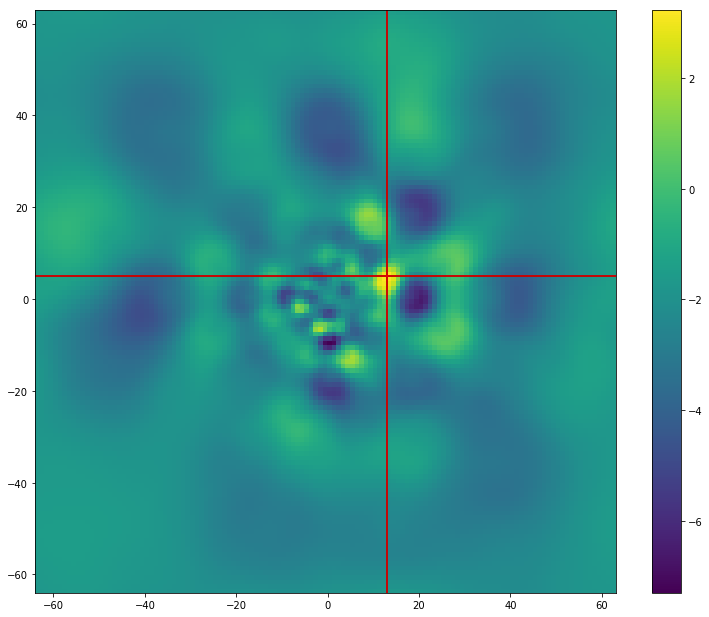

Stimulus position: (-5,-9)
Position prediction: (-5.0,-12.0)
**************************************************


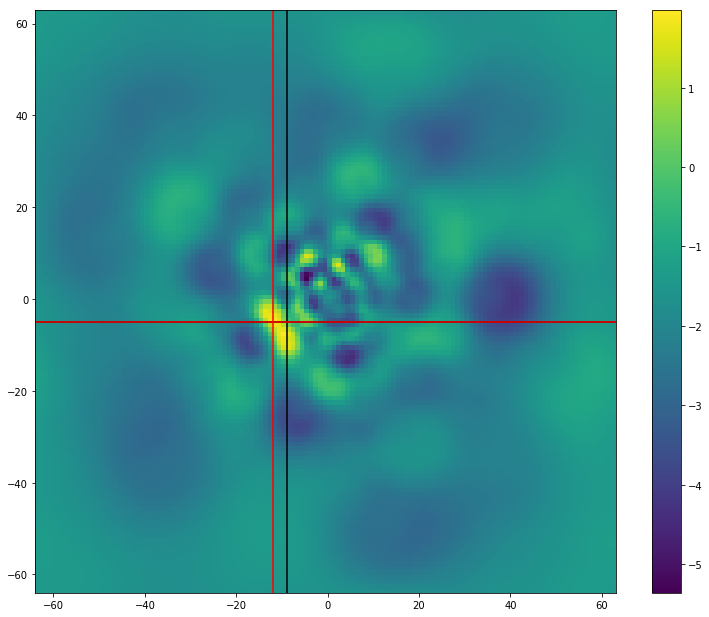

Stimulus position: (0,-3)
Position prediction: (-4.0,-1.0)
**************************************************


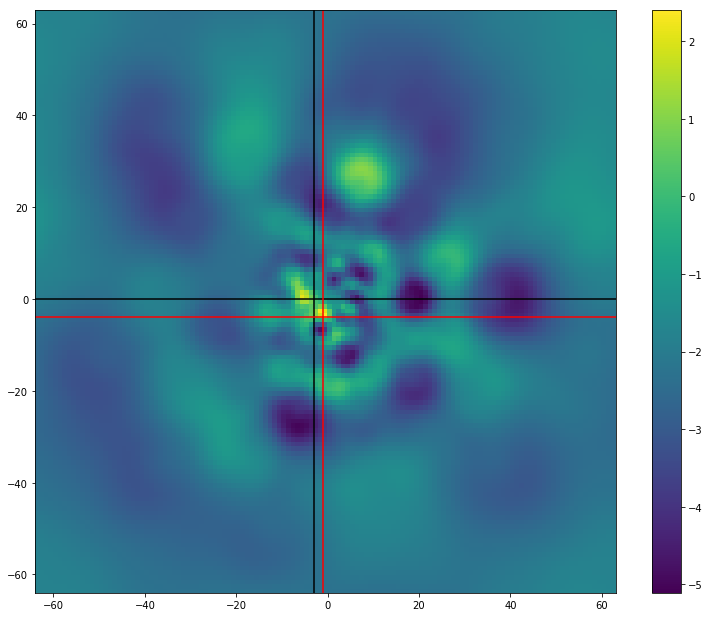

Stimulus position: (-12,10)
Position prediction: (-10.0,1.0)
**************************************************


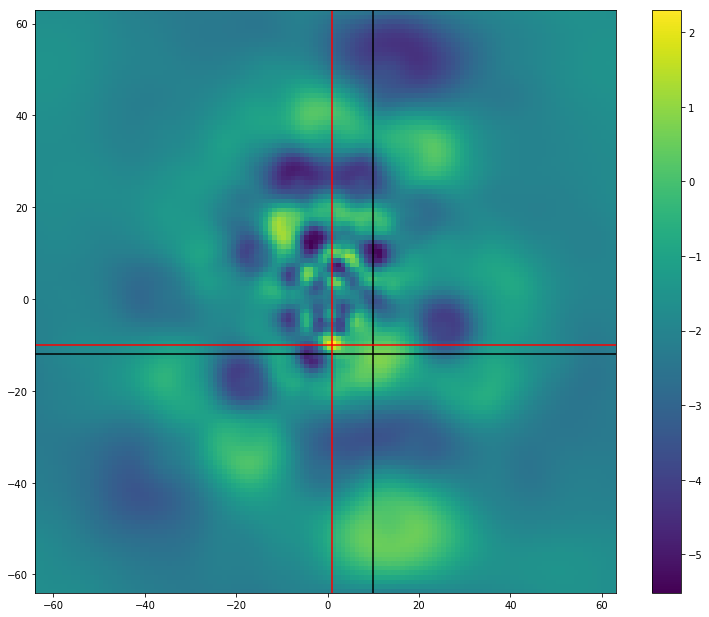

Stimulus position: (-8,1)
Position prediction: (-8.0,-3.0)
**************************************************


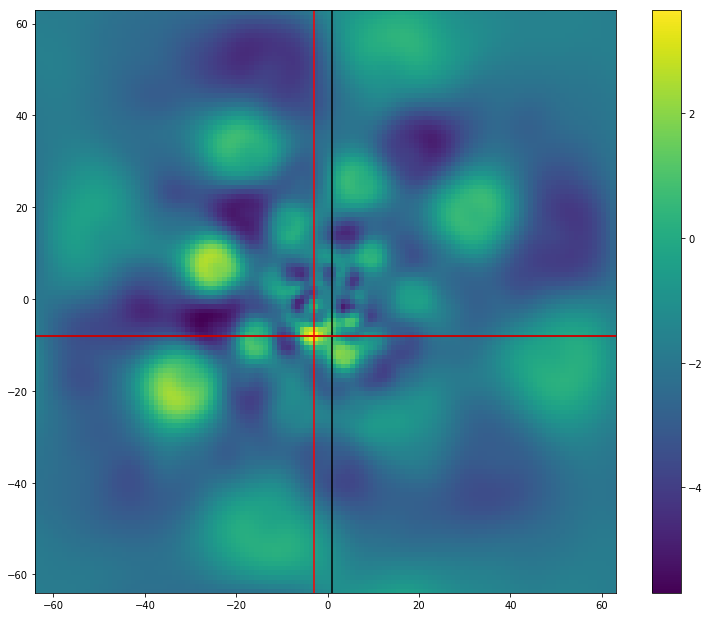

Stimulus position: (-1,-11)
Position prediction: (-3.0,-14.0)
**************************************************


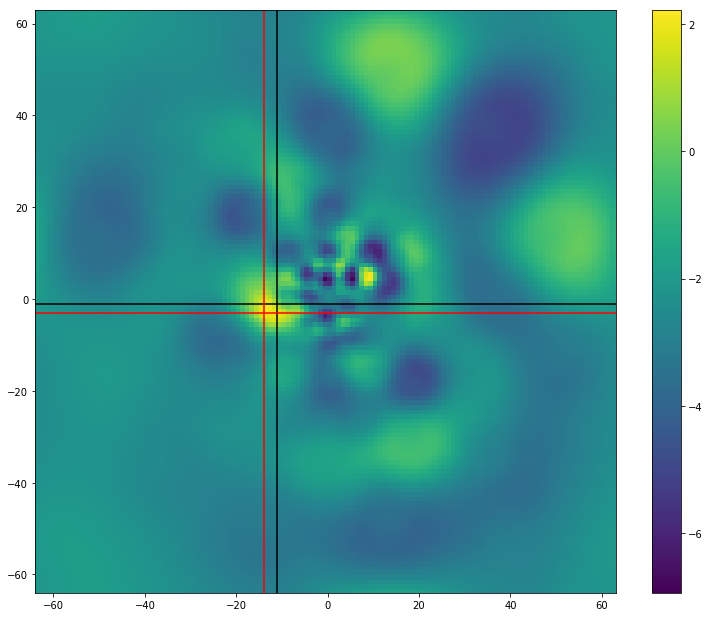

Stimulus position: (3,-5)
Position prediction: (2.0,-7.0)
**************************************************


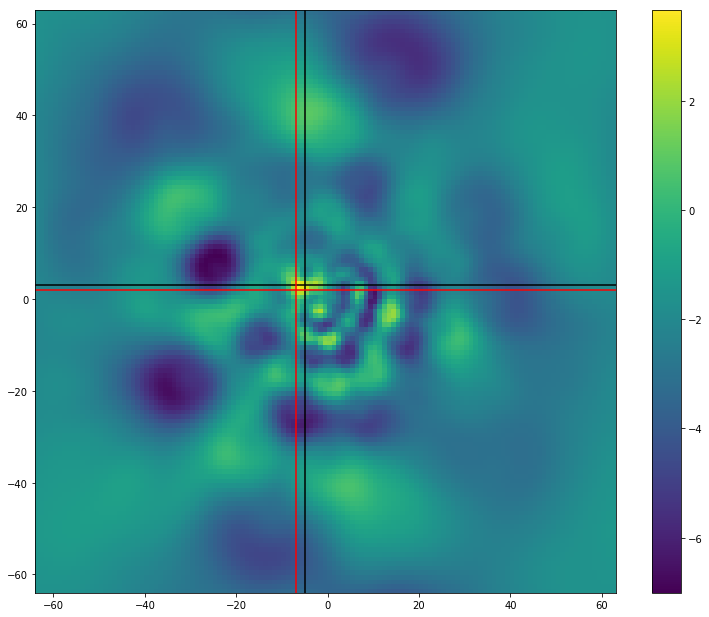

Stimulus position: (5,-7)
Position prediction: (2.0,-7.0)
**************************************************


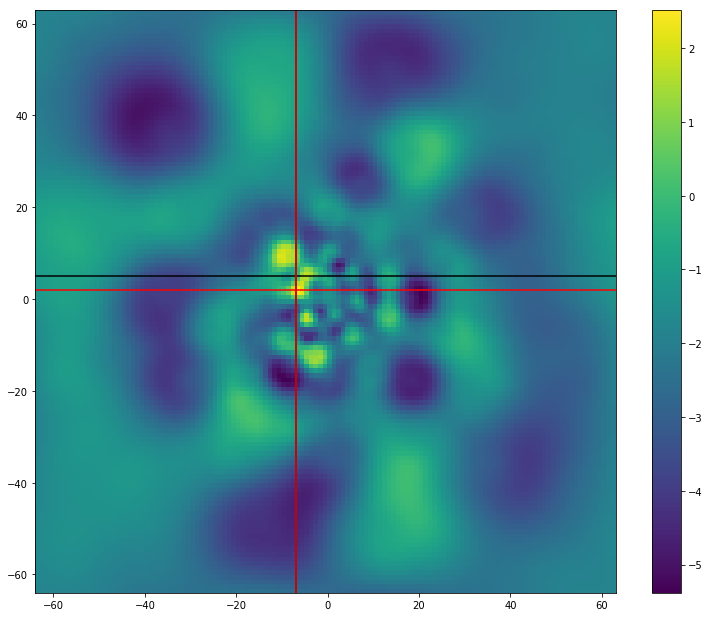

Stimulus position: (-8,1)
Position prediction: (-8.0,3.0)
**************************************************


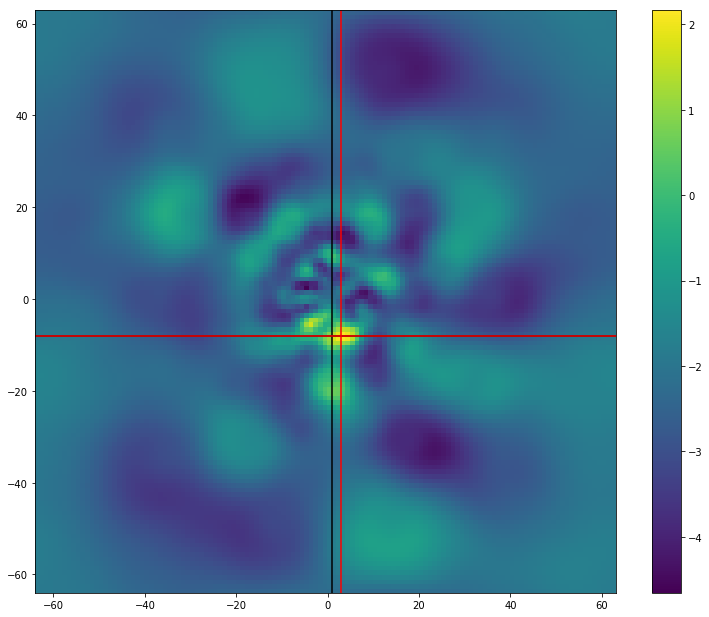

Stimulus position: (4,1)
Position prediction: (6.0,-2.0)
**************************************************


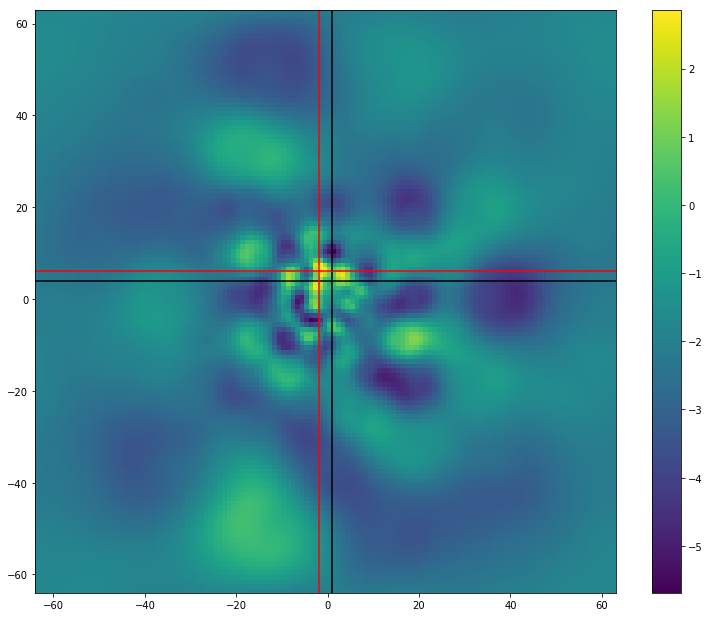

In [10]:
N_test = 10

for _ in range(N_test):
    eval_sacc()
    plt.show()    

Stimulus position: (-4,-14)
Loading pred_data... min, max= -3.3104331 -1.4293218
a_data position (log_r, azimuth) = (0.3573084205152942,-0.27829965900511133)
**************************************************


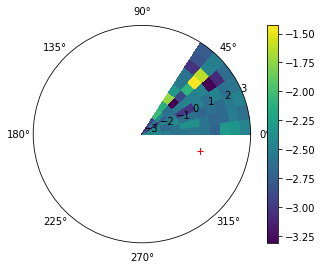

Stimulus position: (-1,3)
Loading pred_data... min, max= -2.692012 0.4389781
a_data position (log_r, azimuth) = (0.05190830234749755,0.3217505543966422)
**************************************************


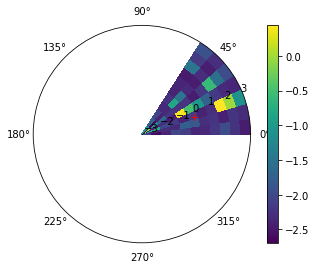

Stimulus position: (5,18)
Loading pred_data... min, max= -3.478873 -1.7435871
a_data position (log_r, azimuth) = (0.40715698526833566,-0.27094685033842053)
**************************************************


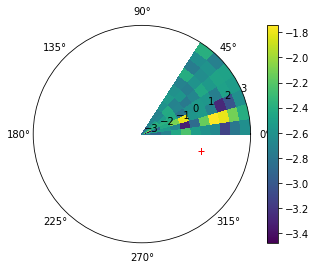

Stimulus position: (18,-4)
Loading pred_data... min, max= -1.8386188 -1.2266637
a_data position (log_r, azimuth) = (0.40454435480911366,1.3521273809209546)
**************************************************


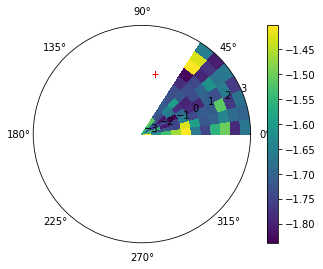

Stimulus position: (0,-13)
Loading pred_data... min, max= -2.4109712 -1.0046853
a_data position (log_r, azimuth) = (0.3346396645404004,-0.0)
**************************************************


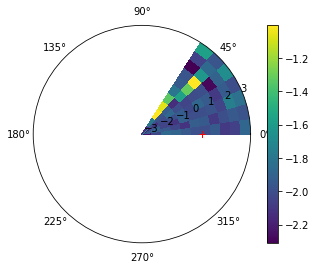

Stimulus position: (-14,-5)
Loading pred_data... min, max= -2.9205716 -1.6759297
a_data position (log_r, azimuth) = (0.3614660631998683,-1.2277723863741932)
**************************************************


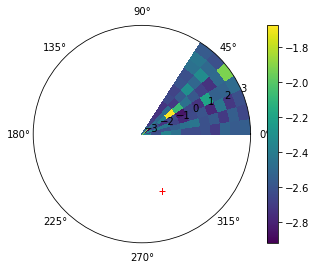

Stimulus position: (5,-5)
Loading pred_data... min, max= -3.0741074 -0.033503808
a_data position (log_r, azimuth) = (0.2128520935909075,0.7853981633974483)
**************************************************


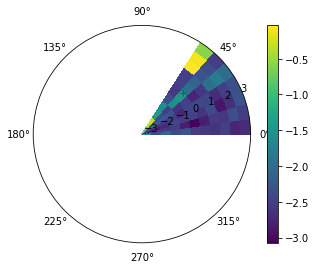

Stimulus position: (-3,0)
Loading pred_data... min, max= -2.4717693 0.20068955
a_data position (log_r, azimuth) = (0.0413722507817148,1.5707963267948966)
**************************************************


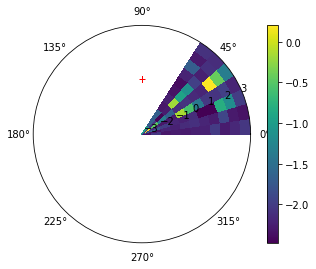

Stimulus position: (-4,-5)
Loading pred_data... min, max= -2.122751 -0.1650536
a_data position (log_r, azimuth) = (0.19300699971852375,-0.6747409422235527)
**************************************************


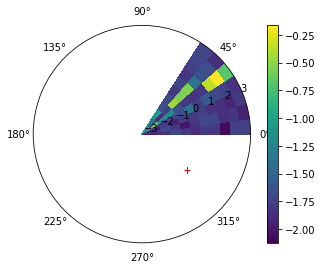

Stimulus position: (6,0)
Loading pred_data... min, max= -2.5000384 0.39416546
a_data position (log_r, azimuth) = (0.18000168689370388,-1.5707963267948966)
**************************************************


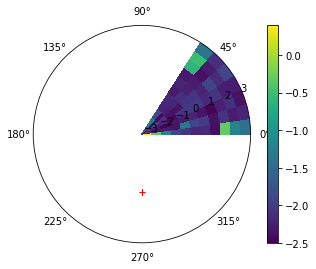

In [11]:
for _ in range(N_test):
    eval_sacc(fig_type='log')
    plt.show()    

In [12]:
eccentricty, azimuth = np.meshgrid(np.linspace(0, 1, N_eccentricity+1), np.linspace(-np.pi, np.pi, N_azimuth+1))
eccentricty.shape, azimuth.shape

((13, 9), (13, 9))

In [13]:
help(plt.pcolor
    )

Help on function pcolor in module matplotlib.pyplot:

pcolor(*args, **kwargs)
    Create a pseudocolor plot of a 2-D array.
    
    Call signatures::
    
        pcolor(C, **kwargs)
        pcolor(X, Y, C, **kwargs)
    
    pcolor can be very slow for large arrays; consider
    using the similar but much faster
    :func:`~matplotlib.pyplot.pcolormesh` instead.
    
    Parameters
    ----------
    C : array_like
        An array of color values.
    
    X, Y : array_like, optional
        If given, specify the (x, y) coordinates of the colored
        quadrilaterals; the quadrilateral for ``C[i,j]`` has corners at::
    
            (X[i,   j],   Y[i,   j]),
            (X[i,   j+1], Y[i,   j+1]),
            (X[i+1, j],   Y[i+1, j]),
            (X[i+1, j+1], Y[i+1, j+1])
    
        Ideally the dimensions of ``X`` and ``Y`` should be one greater
        than those of ``C``; if the dimensions are the same, then the last
        row and column of ``C`` will be ignored.
    
    